<a href="https://colab.research.google.com/github/krutika73/CLASSIFICATION-ON-CARDIOVASCULAR-RISK-PREDICTION/blob/main/Unsupervised_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  Krutika Vijay Bhile


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Netflix, one of the largest streaming platforms globally, boasts a vast library of movies and TV shows. However, the abundance of options makes it difficult for users to locate content that suits their preferences. Thus, this project's objective is to use unsupervised learning techniques to cluster similar titles on Netflix. By grouping movies and TV shows with similar attributes, the project aims to provide users with more targeted recommendations, facilitating the discovery of new content that aligns with their interests.

To achieve this goal, the project will analyze a Netflix title dataset, incorporating features like genre, cast, release year, plot summary, among others. Utilizing clustering algorithms like K-Means or Hierarchical clustering, the project intends to categorize movies and TV shows with comparable attributes.

Ultimately, the project aims to develop a reliable clustering model that can group Netflix titles accurately based on their characteristics. This model can subsequently be used to enhance Netflix's content discovery algorithms or offer recommendations to users.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.cm as cm
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns 
%matplotlib inline

# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Dataset Loading

In [2]:
# import drive
from google.colab import drive
drive.mount('/content/drive')

# Load Dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print("Dataset Size")
print("Rows = {} and  Columns = {}".format(df.shape[0], df.shape[1]))

Dataset Size
Rows = 7787 and  Columns = 12


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


<Axes: >

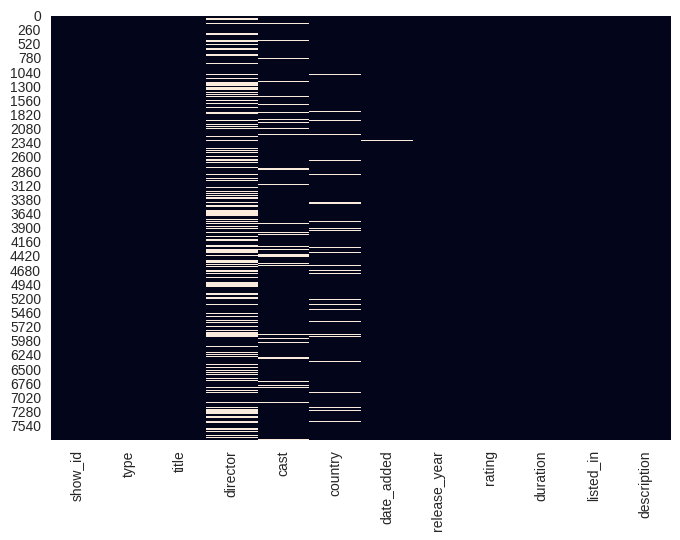

In [9]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar = False)

### What did you know about your dataset?

The dataset utilized for clustering Netflix movies and TV shows encompasses several features of the titles, including genre, rating, release year, duration, director, cast, and type. It comprises 7787 rows and 12 columns. Nonetheless, certain columns like director, cast, and country contain null values, which necessitate addressing during the data analysis phase.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

**show_id** : Unique ID for every Movie / Tv Show

**type** : Identifier - A Movie or TV Show

**title** : Title of the Movie / Tv Show

**director** : Director of the Movie

**cast** : Actors involved in the movie / show

**country** : Country where the movie / show was produced

**date_added** : Date it was added on Netflix

**release_year** : Actual Releaseyear of the movie / show

**rating** : TV Rating of the movie / show

**duration** : Total Duration - in minutes or number of seasons

**listed_in** : Genere

**description** : The Summary description

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ", i , "is" , df[i].nunique(), ".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.

In [14]:
# Summing null values
print('Missing Data Count')
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)

Missing Data Count


director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64

In [15]:
print('Missing Data Percentage')
print(round(df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)/len(df)*100,2))

Missing Data Percentage
director      30.68
cast           9.22
country        6.51
date_added     0.13
rating         0.09
dtype: float64


In [16]:
# The missing values in the 'director', 'cast', and 'country' columns can be replaced with the label 'Unknown'.

In [17]:
df[['director']] = df[['director']].fillna('Unknown')
df[['cast']]     = df[['cast']].fillna('Unknown')
df[['country'] ] = df[['country']].fillna('Unknown')

In [18]:
# We cannot replace missing values in the 'date_added' column. 
# And since they constitute a small and relatively unimportant portion of the data.
# Therefore, we will exclude these values from our analysis.

In [19]:
df.dropna(subset=['date_added'], inplace=True)

In [20]:
df.shape

(7777, 12)

In [21]:
# For the missing values in the 'rating' column, we can impute them with the mode since this attribute is discrete.

In [22]:
df['rating'].fillna(value=df['rating'].mode()[0],inplace=True)

In [23]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [24]:
# To simplify the analysis, we will choose the primary country and primary genre for each entry in the dataframe.

In [25]:
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [26]:
# We will transform the 'duration' column in the dataframe by splitting the string value 
# on whitespace delimiter and then converting it into an integer datatype.

In [27]:
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [28]:
# datatype of duration
df.duration.dtype

dtype('int64')

In [29]:
print("Columns and data types")
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,int64


In [30]:
#Convert timestamp to datetime format to fetch the other details
df["date_added"] = pd.to_datetime(df['date_added'])

In [31]:
#addding new column to dataframe such as 'month_added'and 'year_added' to gain more insights from the data 
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [32]:
# Changing the values in the rating column
# Create a dictionary to map the current ratings to new ratings
rating_map = {'TV-MA':'Adults',
'R':'Adults',
'PG-13':'Teens',
'TV-14':'Young Adults',
'TV-PG':'Older Kids',
'NR':'Adults',
'TV-G':'Kids',
'TV-Y':'Kids',
'TV-Y7':'Older Kids',
'PG':'Older Kids',
'G':'Kids',
'NC-17':'Adults',
'TV-Y7-FV':'Older Kids',
'UR':'Adults'}
# Replace the current ratings with the new ratings using the mapping dictionary
df['rating'].replace(rating_map,inplace=True)
# Print the unique values in the 'rating' column to verify that the changes have been made
print(df['rating'].unique())

['Adults' 'Teens' 'Young Adults' 'Older Kids' 'Kids']


In [33]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,2020,1


### What all manipulations have you done and insights you found?

1)The label 'Unknown' was used to replace missing values in the 'director', 'cast', and 'country' columns.

2)The mode was used for imputing missing values in the 'rating' column.
For simplifying the analysis, the primary country and primary genre were selected for each entry in the dataframe.

3)The 'duration' column in the dataframe was transformed by converting the string value to an integer datatype after splitting it on a whitespace delimiter.

4)To extract additional details, the timestamp in the 'date_added' column was converted to datetime format, and new columns such as 'month_added' and 'year_added' were added to the dataframe.

5)A dictionary was created to map the current ratings to new ratings, which were then used to replace the values in the rating column.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1) TYPE    (Univariate Analysis)

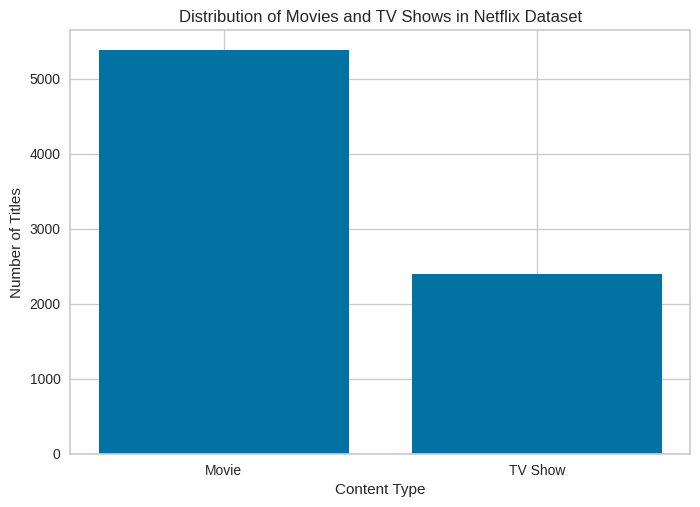

In [34]:
# Chart - 1 visualization code

type_counts = df['type'].value_counts()        # Count the occurrences of each unique value in the 'type' column
plt.bar(type_counts.index, type_counts.values) # Create a bar chart of the type counts
plt.xlabel('Content Type')                     # Add labels and a title to the chart
plt.ylabel('Number of Titles')
plt.title('Distribution of Movies and TV Shows in Netflix Dataset')
plt.show()                                     # Show the chart

##### 1. Why did you pick the specific chart?

For displaying the distribution of categorical data, such as the number of movies and TV shows in the Netflix dataset, a bar chart is a suitable option. It facilitates simple comparison between categories and offers a clear visualization of the overall content type distribution in the dataset, making it a fitting choice for this particular dataset and research inquiry.

##### 2. What is/are the insight(s) found from the chart?

The Netflix dataset contains a higher count of movies compared to TV shows, indicating a preference towards movies on the platform. However, it is important to note that TV shows still make up a significant portion of the dataset, suggesting that Netflix also invests in producing and acquiring TV shows for its platform.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The bar chart provides valuable insights for Netflix's business decisions. Understanding that movies are the majority of the content in the dataset and that Netflix has a preference towards them can inform decisions related to content production and acquisition. This information may lead to a strategic allocation of resources towards producing and acquiring more movies, potentially attracting more viewers and subscribers.

#### Chart - 2) DIRECTOR   (Univariate Analysis)

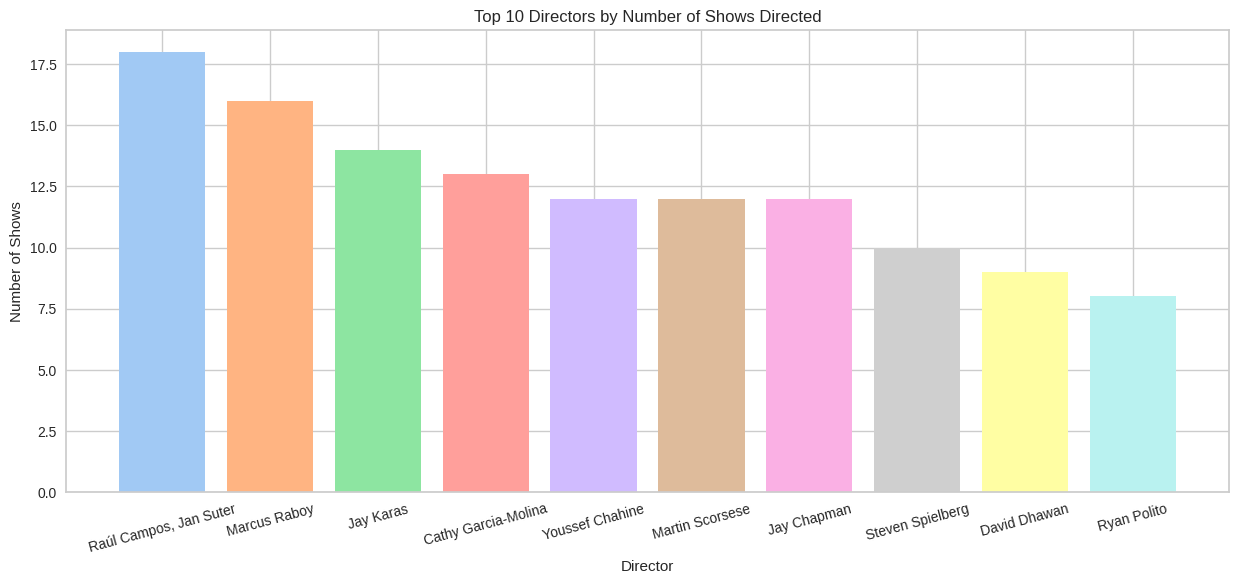

In [35]:
# Chart - 2 visualization code
# Filter out the rows where the director is unknown, count the number of shows for each director, and plot the top 10
top_directors = df.loc[df['director'] != 'Unknown', 'director'].value_counts().nlargest(10)
plt.figure(figsize=(15,6))
colors = sns.color_palette('pastel', n_colors=10)
plt.bar(top_directors.index, top_directors.values, color=colors)
plt.title('Top 10 Directors by Number of Shows Directed')
plt.xlabel('Director')
plt.ylabel('Number of Shows')
plt.xticks(rotation=15)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is an effective way to visualize the top 10 directors in the Netflix dataset, ranked by the number of shows they have directed. This chart is useful for understanding the relationship between directors and the amount of content they have contributed to Netflix, and it provides insights into the most prominent directors on the platform. Additionally, the use of color in the chart enhances its visual appeal and readability.

##### 2. What is/are the insight(s) found from the chart?

1)Raul Campos and Jan Suter are the top directors in the Netflix dataset, having directed the highest number of shows at 18.

2)Marcus Raboy is the second most popular director, having directed 16 shows.

3)The majority of the top 10 directors have directed between 7-11 shows on Netflix.

4)With the exception of David Dhawan from India, all of the top 10 directors are from the US.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The valuable insights gained from analyzing the top directors and their past work on Netflix may guide decisions related to content production and acquisition.

#### Chart - 3) CAST (Univariate Analysis)

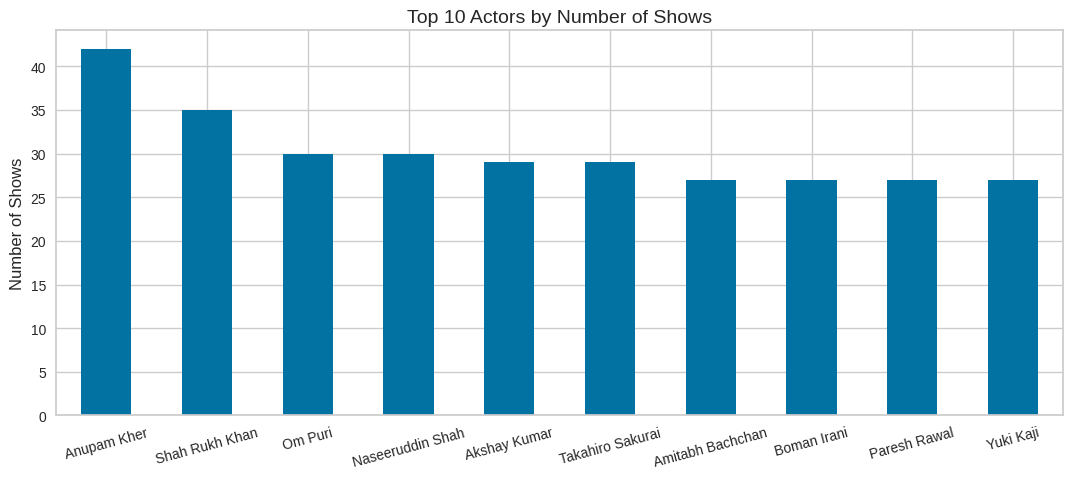

In [36]:
# Chart - 3 visualization code
filtered_df = df[~(df['cast']=='Unknown')]                       # Filtering out unknown cast members
split_cast = filtered_df['cast'].str.split(', ', expand=True)    # split remaining cast into separate values
cast_values = split_cast.stack().reset_index(level=1, drop=True)
top_10_actors = cast_values.value_counts().nlargest(10)          #the top 10 actors by number of shows
top_10_actors.plot(kind='bar', figsize=(13,5))                   # Create a bar chart
plt.title('Top 10 Actors by Number of Shows', fontsize=14)       # Set chart title
plt.ylabel('Number of Shows', fontsize=12)                       #y-axis label
plt.xticks(rotation=15)                                          #x-axis label with rotation
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is used to display the top 10 actors in the Netflix dataset, based on the number of shows they appeared in. This chart is useful in examining the association between actors and the number of shows they have been part of on Netflix, and it can offer significant insights into the most in-demand actors on the platform.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals valuable insights about the popularity of actors on Netflix, including:

Anupam Kher is the most frequently appearing actor on the platform, having appeared in 42 shows in the dataset.

Shah Rukh Khan follows closely behind, having appeared in 35 shows.

The majority of the top 10 actors have appeared in 25-30 shows on Netflix.

With the exception of Takahiro Sakurai and Yuki Kaji from Japan, the top 10 actors are primarily from India.

These insights can inform decisions related to content production and acquisition by providing information about the most popular actors on Netflix and their past work.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1)The knowledge of the most popular actors on the platform can aid Netflix in acquiring or producing content that showcases these actors, potentially resulting in increased viewership and engagement on their platform.

2)These insights may assist in identifying the target audience for various titles, as different actors may appeal to different demographics, enabling Netflix to cater to their audience's preferences better.

3)The data can also help Netflix recognize patterns and preferences among its user base, which can inform decisions regarding content acquisition and production.

#### Chart - 4) COUNTRY (Univariate Analysis)

Text(0, 0.5, 'Country')

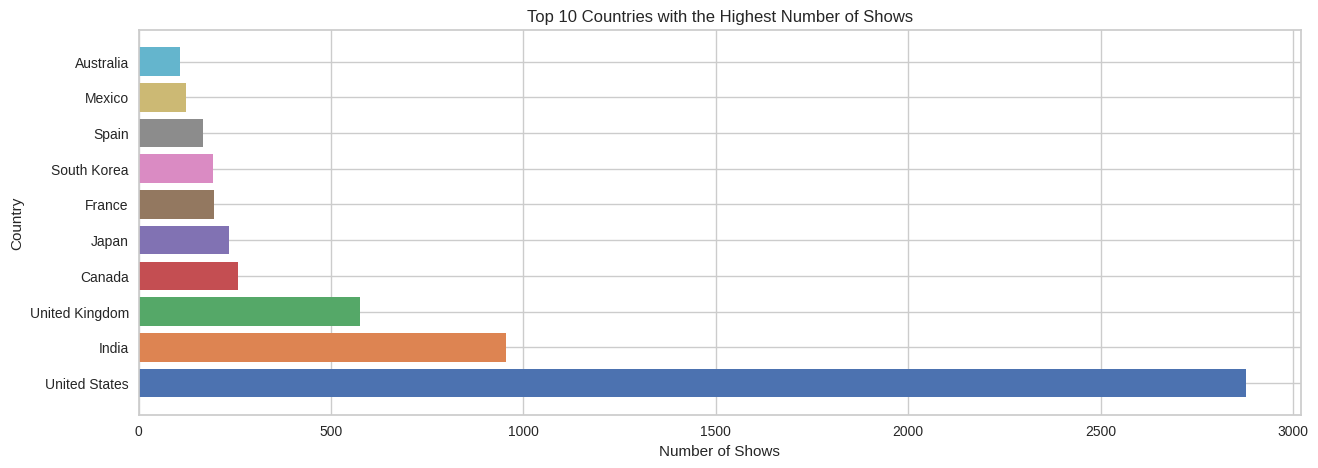

In [37]:
# Chart - 4 visualization code
# Get the top 10 countries with the highest number of movies and TV shows in the dataset
top_countries = df.loc[df['country'] != 'Unknown', 'country'].value_counts().nlargest(10)
plt.figure(figsize=(15,5))
colors = sns.color_palette('deep', n_colors=10)
plt.barh(top_countries.index, top_countries.values, color=colors) # Plot a horizontal bar chart
plt.title('Top 10 Countries with the Highest Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')

In [38]:
# Calculate the percentage share of shows by the top 3 and top 10 countries
top_3_share = top_countries.nlargest(3).sum() / len(df) * 100
top_10_share = top_countries.sum() / len(df) * 100

# Print the percentage shares
print(f"The top 3 countries account for {top_3_share:.2f}% of shows in the dataset.")
print(f"The top 10 countries account for {top_10_share:.2f}% of shows in the dataset.")

The top 3 countries account for 56.69% of shows in the dataset.
The top 10 countries account for 73.19% of shows in the dataset.


##### 1. Why did you pick the specific chart?

I chose this chart because it displays the top 10 countries with the highest number of movies and TV shows in the Netflix dataset, which provides valuable information for companies seeking to enter or expand in the global streaming market.

##### 2. What is/are the insight(s) found from the chart?

According to the chart, the United States dominates the production of movies and TV shows in the Netflix dataset with over 2,500 titles. India, the United Kingdom, and Canada are the next highest producing countries, each with around 500-1000 titles. The top 10 countries, including France, Japan, and Spain, account for 73.19% of shows, with the top 3 countries (USA, India, UK) contributing 56.69%. This information is valuable for businesses looking to understand the global streaming market and identify potential areas for expansion or investment.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart can have a significant impact on businesses in the streaming industry. Understanding that the US is the largest producer of movies and TV shows can help companies plan their content acquisition and marketing strategies. Furthermore, the knowledge that the top 3 countries account for more than half of the shows in the dataset can assist companies in targeting these markets to increase their viewership and expand their operations.

#### Chart - 5) LISTED IN (Univariate Analysis)

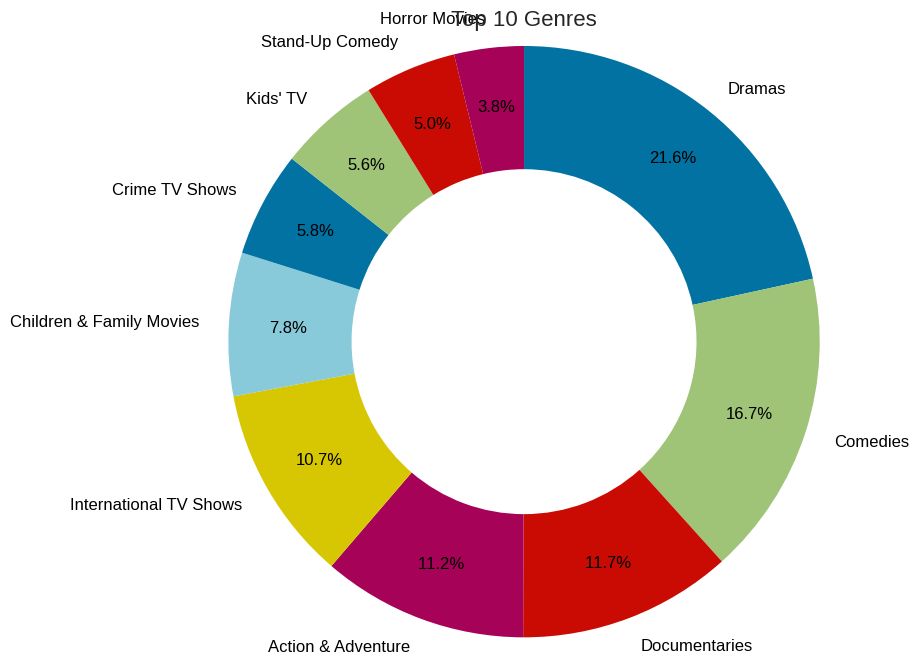

In [39]:
# Chart - 5 visualization code
top_genres = df["listed_in"].value_counts().head(10)
plt.figure(figsize=(8,8))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1, 
        radius=1.2, wedgeprops=dict(width=0.5), startangle=90, 
        textprops=dict(color="black", fontsize=12), counterclock=False)
plt.title('Top 10 Genres', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

I selected the pie chart because it effectively illustrates the distribution of the top 10 genres in the Netflix dataset. Pie charts are ideal for displaying relative proportions or percentages of categorical data, making them a suitable choice for this analysis.

##### 2. What is/are the insight(s) found from the chart?

The pie chart effectively illustrates the proportion of each genre among the top 10 genres in the Netflix dataset. By analyzing this chart, we can conclude that dramas are the most prevalent genre, followed by comedies and documentaries. The chart also highlights that the top 10 genres constitute a considerable portion of the dataset, emphasizing the importance of these genres in the streaming industry.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By using the insights gained from the chart, Netflix can gain a deeper understanding of their audience's content preferences. This information can be used to make data-driven decisions about which types of content to acquire and produce, ultimately leading to increased viewership and revenue. The pie chart provides valuable information about the most popular genres in the Netflix dataset, allowing Netflix to tailor their content strategy to better align with their audience's preferences.

#### Chart - 6) RATING  (Univariate Analysis)

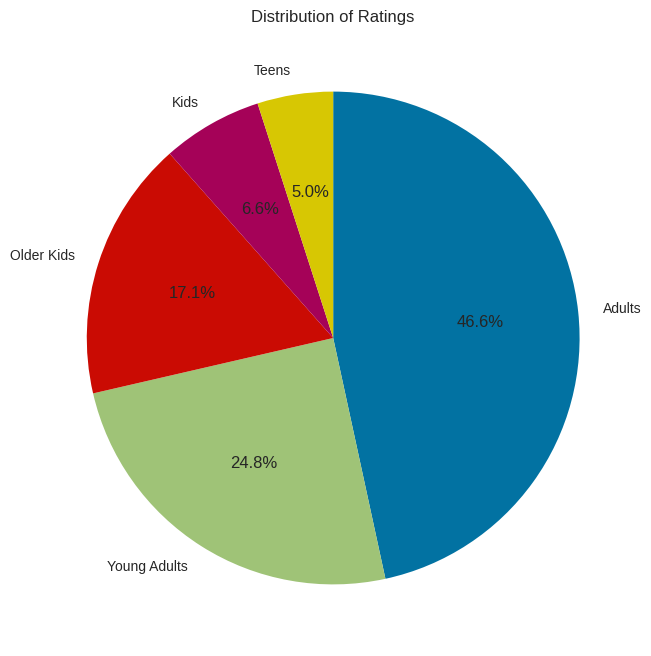

In [40]:
# Chart - 6 visualization code
df_rating = df['rating'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(df_rating.values, labels=df_rating.index, 
        autopct='%1.1f%%',startangle=90, counterclock=False)
plt.title('Distribution of Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

I chose to use a pie chart to illustrate the distribution of content ratings in the Netflix dataset as it is an efficient way to depict the proportion of data in each category. The chart clearly displays the percentage of titles in each rating category, making it easy to observe that the majority of titles in the dataset are TV-MA, followed by TV-14 and TV-PG.

##### 2. What is/are the insight(s) found from the chart?

The chart illustrates the distribution of content ratings in the Netflix dataset. As per the chart, the majority of titles in the dataset have been rated as Adults (TV-MA - Mature Audiences), which comprises nearly 47% of all titles. Additionally, Young Adults (TV-14 - Parents Strongly Cautioned) and Older Kids (TV-PG - Parental Guidance Suggested) are the next most common ratings, representing approximately 25% and 17% of titles, respectively.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By gaining insights into the distribution of content ratings in the Netflix dataset, businesses can make informed decisions about their content acquisition and creation strategies. The fact that the TV-MA rating is the most common suggests a strong demand for mature content on the platform, which could guide decisions about what types of content to acquire or produce to cater to this audience. Additionally, understanding the distribution of ratings can help businesses tailor their marketing efforts to different demographics and promote content that is likely to be popular with specific age groups.

#### Chart - 7)  MONTH ADDED (Univariate Analysis)

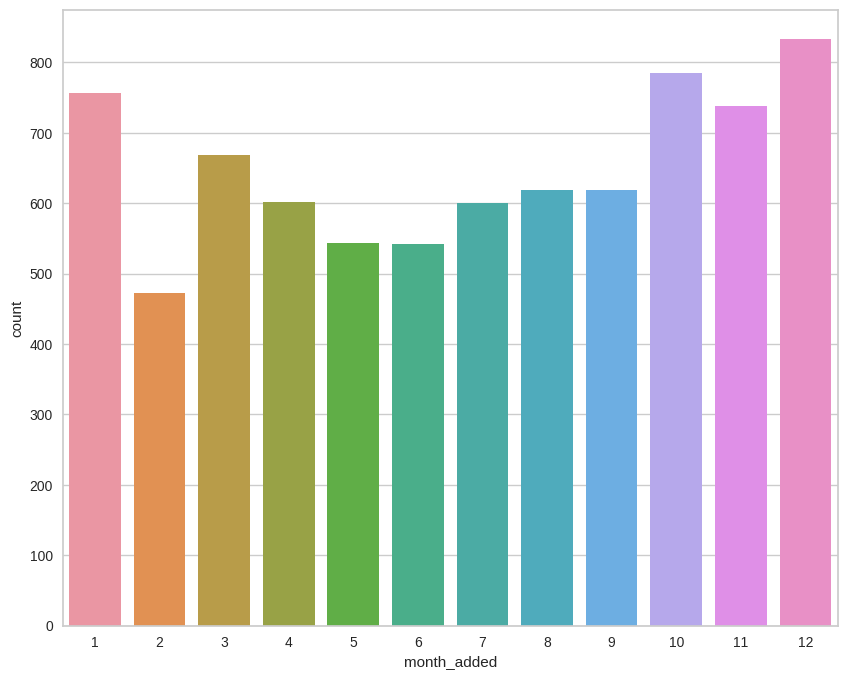

In [41]:
# Chart - 7 visualization code
# Plotting the Countplot
plt.figure(figsize=(10,8))
ax = sns.countplot(x='month_added', data=df)
plt.show()

##### 1. Why did you pick the specific chart?

This count plot, created using the seaborn library, displays the number of TV shows and movies added to Netflix for each month in the dataset. The plot provides a clear and concise visualization of the trends in content additions over time.

##### 2. What is/are the insight(s) found from the chart?

The Count Plot provides valuable insights into the frequency of TV shows and movies added to Netflix for each month in the dataset. By analyzing this chart, we can identify the months with the highest and lowest number of additions to the platform, which can help inform decisions related to content acquisition and release schedule. Specifically, the chart indicates that the highest number of movies were added between October and January, while the number of additions was relatively low during the rest of the year. This information could be useful for Netflix to plan their content acquisition strategy and ensure a consistent flow of new releases throughout the year.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 The chart provides valuable insights that could help Netflix identify areas for improvement. For instance, if there are months with low numbers of additions, Netflix may consider acquiring more content during those months or releasing more original content to fill the gaps. On the other hand, if there are months with a high number of additions, Netflix may need to adjust its release schedule to avoid overcrowding the platform with too much content at once. These actions could help ensure a consistent flow of content and prevent user fatigue, ultimately improving user engagement and satisfaction.

#### Chart - 8) TYPE VS DURATION  (Bivariate Analysis)

Text(0.5, 1.0, 'Number of Seasons per TV Show Distribution')

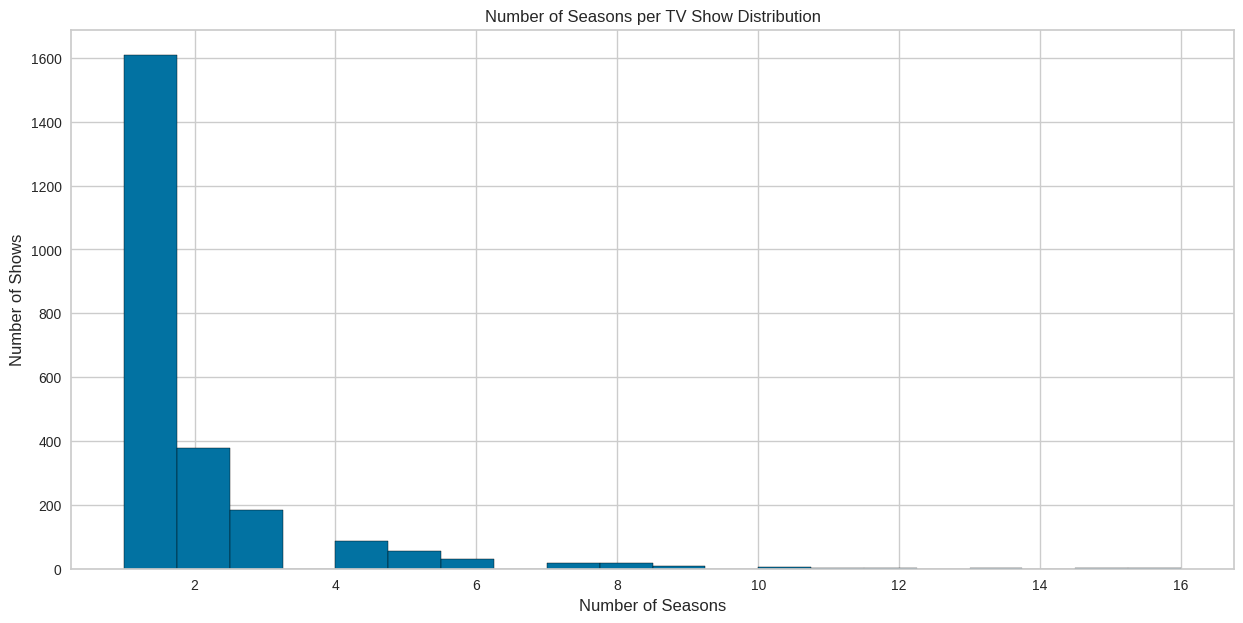

In [42]:
# Chart - 8 visualization code
tv_shows = df[df['type'] == 'TV Show']                    # Filter the dataframe to only include TV shows
plt.figure(figsize=(15, 7))                               # Create a histogram of the number of seasons per TV show
plt.hist(tv_shows['duration'], bins=20, edgecolor='black')
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Number of Shows', fontsize=12)
plt.title('Number of Seasons per TV Show Distribution')

##### 1. Why did you pick the specific chart?

The chart represents a histogram that displays how many TV shows in the dataset have a particular number of seasons. This information can be used to identify the most frequent number of seasons in TV shows and the spread of data.

##### 2. What is/are the insight(s) found from the chart?

1)Most TV shows have one to three seasons.

2)Few TV shows have more than 10 seasons.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1)Understanding that shorter seasons may be more popular and successful could guide Netflix's decisions on the number of seasons to order for new shows.

2)Knowing the distribution of the number of seasons per TV show can be valuable in negotiating the length of a show with production companies.

#### Chart - 9) RELEASE YEAR VS TYPE (Univariate Analysis)

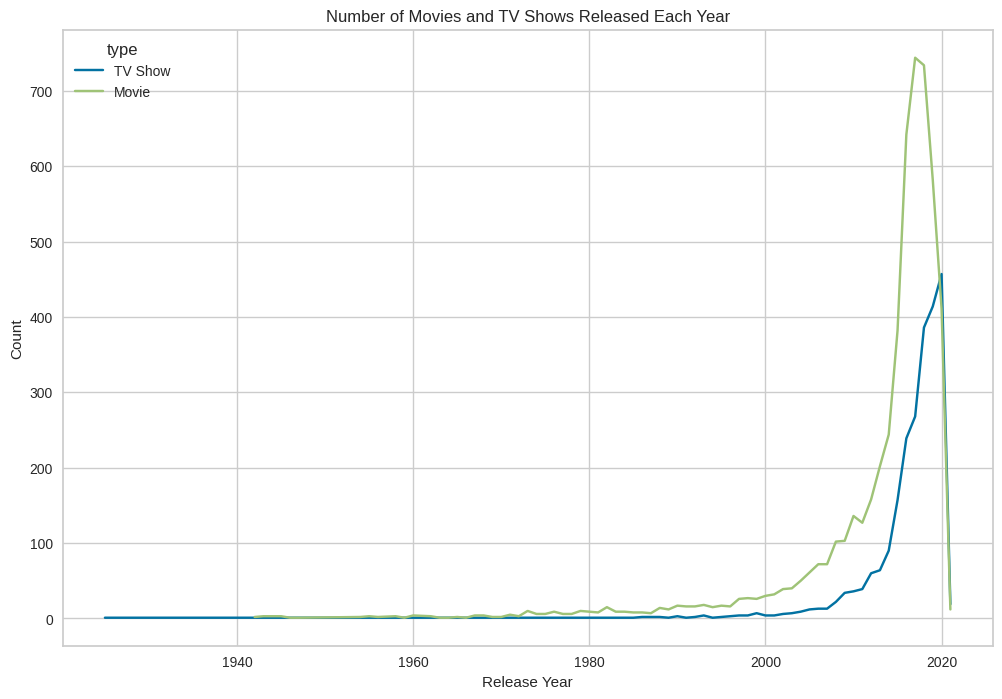

In [43]:
# Chart - 9 visualization code
df_release_year = df.groupby(['release_year', 'type'])['show_id'].count().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_release_year, x='release_year', y='show_id', hue='type')
plt.title('Number of Movies and TV Shows Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I selected this chart because it shows how the number of movies and TV shows added to Netflix has changed over time. By using a line plot, this chart makes it simple to compare the trends in the release of movies and TV shows each year. Additionally, the chart's color coding allows for a quick visual comparison of the two types of content. Overall, this chart can be useful for understanding the relationship between the year of release and the number of movies and TV shows added to Netflix.

##### 2. What is/are the insight(s) found from the chart?

1)This chart provides insights into the trend of media content production over the years by showing the number of movies and TV shows released each year.

2)The line plot demonstrates a significant increase in the number of movies produced from the mid-2000s to 2020, while the number of TV shows produced has also increased but not as much as movies.

3)A dip in movie production in 2020 is also visible in the chart, which may be attributed to the COVID-19 pandemic.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can have a significant impact on the business. It can provide valuable information for content creators, streaming platforms, and investors. For instance, the increased production of movies suggests a change in audience preferences towards movies, which can guide content creation and platform offerings. However, the dip in movie production due to the COVID-19 pandemic can have a negative impact, leading to a shortage of new content for streaming platforms and reduced revenue for content creators.

#### Chart - 10) TYPE VS RELEASE YEAR (Bivariate Analysis)

In [44]:
df.release_year.value_counts()

2018    1120
2017    1012
2019     996
2016     881
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: release_year, Length: 73, dtype: int64

In [45]:
# We can observe from the visualization that the number of shows released on Netflix has increased significantly in recent years, 
# indicating that Netflix has gained more popularity in recent times.

Text(0.5, 1.0, 'Number of Shows Released Each Year Since 2008 on Netflix')

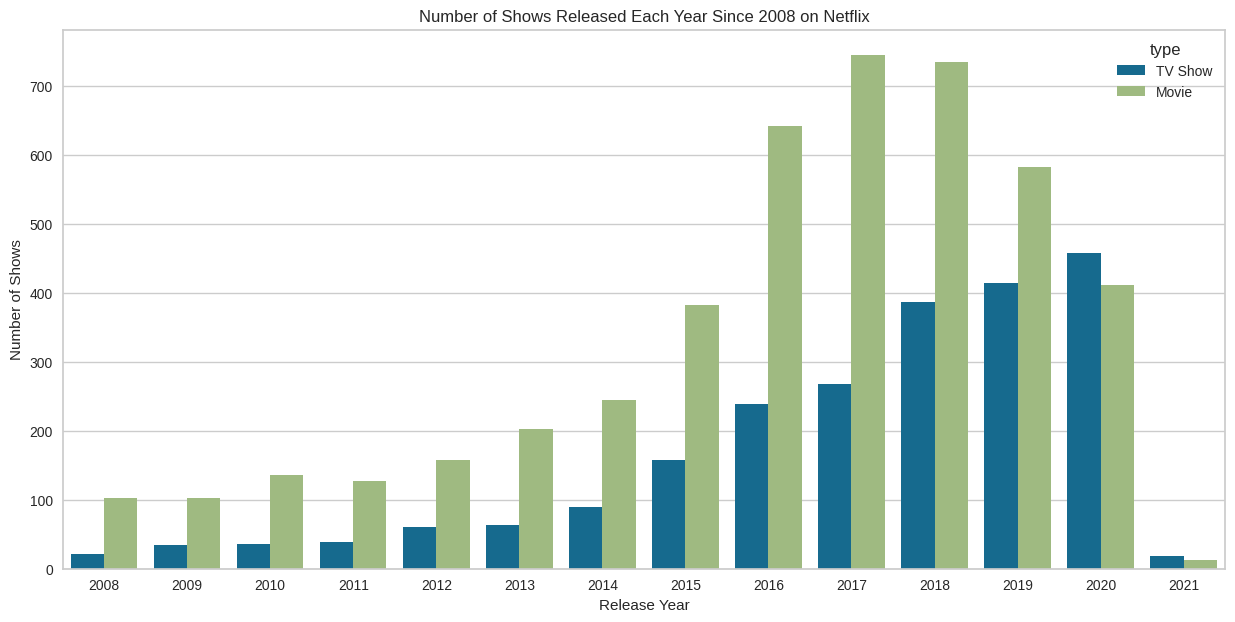

In [46]:
# Chart - 10 visualization code
filtered_df = df[df['release_year'] >= 2008]
plt.figure(figsize=(15, 7))
sns.countplot(x='release_year', data=filtered_df, hue='type', order=range(2008, 2022))
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.title('Number of Shows Released Each Year Since 2008 on Netflix')

##### 1. Why did you pick the specific chart?

The reason for selecting this chart is that it displays the trend in the yearly release of TV shows and movies since 2008, with a clear comparison of the two types of content.

##### 2. What is/are the insight(s) found from the chart?

1.This chart shows an upward trend in the yearly release of TV shows since 2008.

2.TV show releases have been steady over the years, with slight fluctuations.

3.The chart suggests a shift towards producing more original movies content on Netflix, based on the difference in the number of movies and TV shows released each year.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Insights from this chart can positively impact Netflix's business by providing information on content production trends, allowing them to make strategic decisions regarding future content type and quantity. This chart does not provide any insights that could lead to negative growth.

#### Chart - 11) COUNTRY VS SHOW ID (Bivariate Analysis)

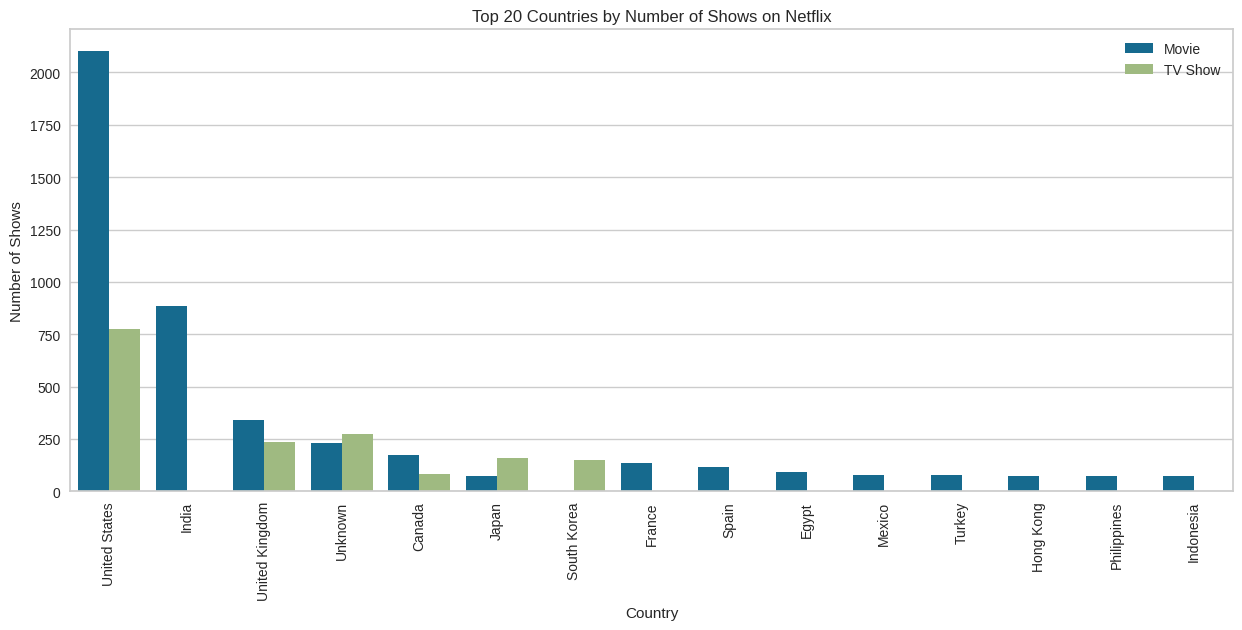

In [47]:
# Chart - 11 visualization code
# group the data by country and type, and count the number of shows
df_country = df.groupby(['country', 'type'])['show_id'].count().reset_index()
df_country = df_country.sort_values(by='show_id', ascending=False)            # sort the data in descending order
plt.figure(figsize=(15, 6))
sns.barplot(data=df_country[:20], x='country', y='show_id', hue='type')       # plot a bar chart of the top 20 countries
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('Top 20 Countries by Number of Shows on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.show()

##### 1. Why did you pick the specific chart?

I selected this chart for its ability to provide valuable insights into the top 20 countries with the highest number of shows on Netflix, categorized by country and show type. These insights can be leveraged to inform content acquisition and localization strategies for Netflix.

##### 2. What is/are the insight(s) found from the chart?

The chart displays the top 20 countries with the highest number of shows on Netflix, providing valuable information for content acquisition and localization strategies. The United States has the largest amount of content available on Netflix with over 2,000 shows, followed by India with over 800 shows and the United Kingdom with over 300 shows. In terms of show types, most of the content in these countries are movies, with the United Kingdom having a relatively equal distribution between movies and TV shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Analyzing the chart can lead to a positive business impact by guiding content acquisition and localization strategies. For instance, companies can prioritize acquiring content from countries with the highest number of shows on Netflix to expand their content library in a specific region. Additionally, localization strategies such as dubbing or subtitling can be developed for these regions to increase viewership and revenue.

#### Chart - 12) CAST VS TV SHOW (Bivariate Analysis)

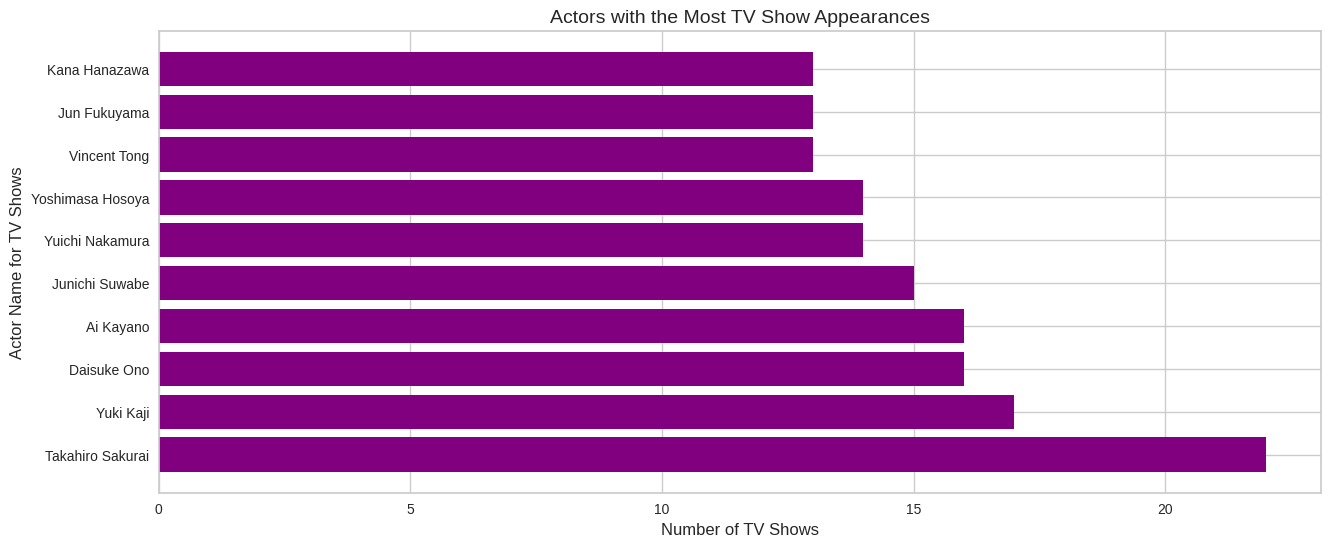

In [48]:
# Chart - 12 visualization code
# Selecting TV shows with known cast information
tv_shows = df[(df['type'] == 'TV Show') & ~(df['cast'] == 'Unknown')]
# Counting the number of TV shows each actor has appeared in
actor_counts = tv_shows['cast'].str.split(', ').explode().value_counts()
top_actors = actor_counts.head(10)             # Selecting the top 10 actors with the most TV show appearances
plt.figure(figsize=(15, 6))                    # Creating a horizontal bar plot of the top actors
plt.barh(top_actors.index, top_actors.values, color='purple')
plt.xlabel('Number of TV Shows', fontsize=12)
plt.ylabel('Actor Name for TV Shows', fontsize=12)
plt.title('Actors with the Most TV Show Appearances', fontsize=14)
plt.show()

##### 1. Why did you pick the specific chart?

The horizontal bar plot represents the top 10 actors with the highest number of appearances in TV shows, providing insights into the most frequently cast actors in this medium. This chart could be valuable for individuals in the entertainment industry or those interested in popular culture who want to stay updated on which actors are in demand for TV show roles.

##### 2. What is/are the insight(s) found from the chart?

The chart depicts the top 10 actors with the highest number of TV show appearances on Netflix, indicating that Takahiro Sakurai has the most appearances, followed by Yuki Kaji and Daisuke Ono. This information could be leveraged to identify popular actors that could attract audiences for new TV show releases, making the insights valuable for content creators and streaming platforms.






##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart could positively impact the selection of actors for TV shows. Casting popular actors could potentially increase viewership and have a positive impact on business. However, it is important to note that an actor's popularity alone is not a guarantee of success, as the quality of the TV show is also a significant factor.






#### Chart - 13 WORDCLOUD

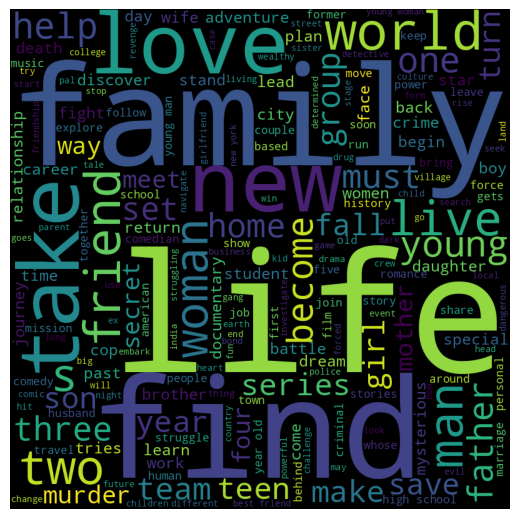

In [49]:
# Chart - 13 visualization code
# Join all the movie descriptions together into a single string
comment_words = ' '.join(df['description'].astype(str).str.lower())
stopwords = set(STOPWORDS)                                   # Define the stopwords
wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)
plt.figure(figsize=(10,5), facecolor=None)                   # Plot the word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()                                                   # Display the plot

##### 1. Why did you pick the specific chart?

This code generates a word cloud using the descriptions of shows and movies in the Netflix dataset, providing a quick and easy way to visualize the most frequent words and themes in the content. This insight can be useful for understanding the overall genre and content themes available on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The word cloud generated from the Netflix dataset provides valuable insights into the frequently occurring words and phrases in the descriptions of shows and movies. This information can be used to identify the popular themes and genres among Netflix users, and also to discover unique keywords and phrases for marketing purposes. The most common words in the word cloud include "life", "family", "friend", "love", and others.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the word cloud can benefit Netflix by enabling them to understand their users' interests better and personalize their content to meet those interests. This can result in a positive business impact by allowing Netflix to create more effective marketing campaigns and enhance the overall user experience.

#### Chart - 14 Correlation Heatmap (Multivariate Analysis)

<Axes: >

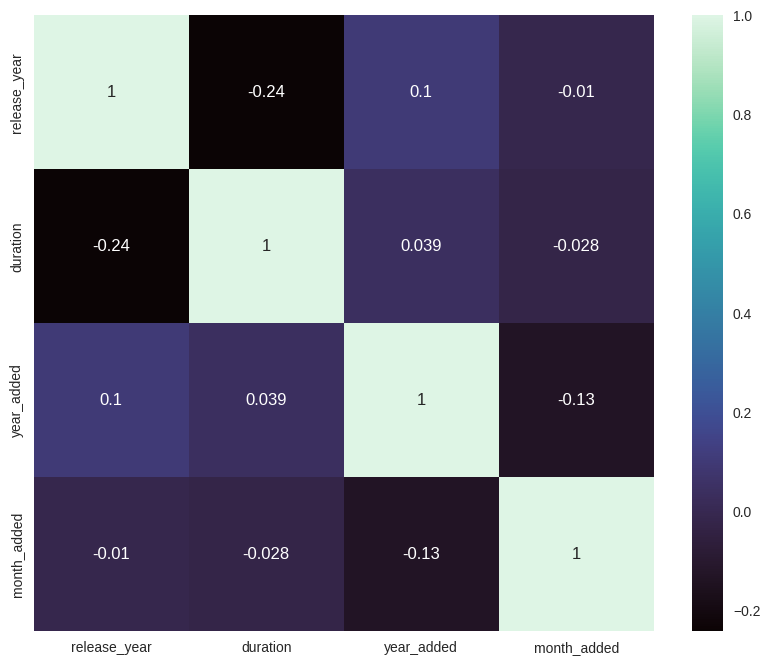

In [50]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))
correlation = df.corr()
sns.heatmap((correlation), annot=True, cmap=sns.color_palette("mako", as_cmap=True))

##### 1. Why did you pick the specific chart?

This heatmap provides a visual representation of the correlation coefficients among the numerical columns in the Netflix dataset. Positive correlation is represented by lighter colors, while negative correlation is represented by darker colors. The values of the correlation coefficients are also displayed within each cell of the heatmap, thanks to the annotation parameter being set to True.

##### 2. What is/are the insight(s) found from the chart?

This heatmap is a useful tool for identifying the relationships between different variables in the Netflix dataset. By analyzing the heatmap, we can easily see which variables have a strong positive or negative correlation with each other, which can help in making predictions and building machine learning models.

Overall, this heatmap can provide valuable insights into the relationships between different variables in the Netflix dataset.

1) We can see that duration and release year are negatively correlated by 24%.

2) year added and release year are positively correlated by 10%.

#### Chart - 15 Pair Plot (Multivariate Analysis)

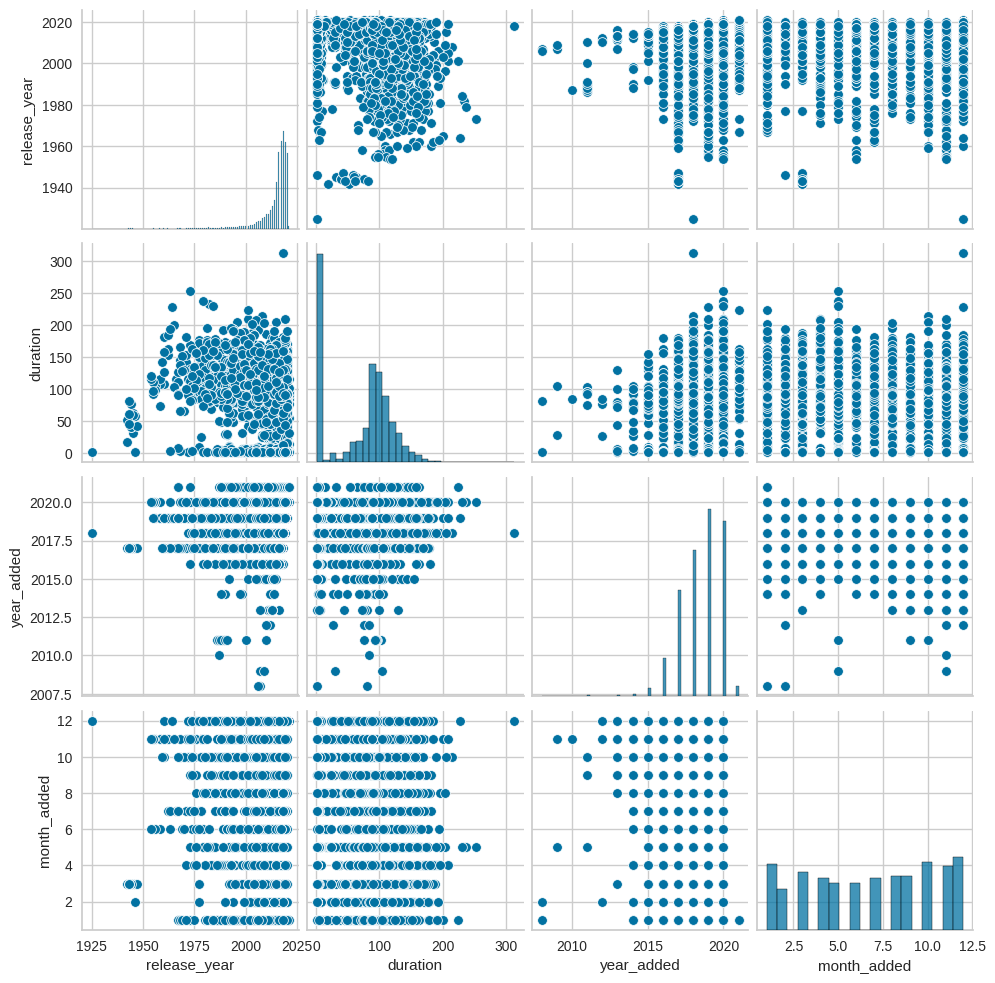

In [51]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot provides a comprehensive view of the numerical variables in the dataset, allowing for a deeper exploration of the relationships and patterns between each pair of variables. With scatter plots and histograms, it can reveal insights into the distribution and correlations of the data, which can aid in making informed decisions and identifying trends in the dataset.

##### 2. What is/are the insight(s) found from the chart?

1.The diagonal plots in the pair plot show the distribution and range of each variable. The duration of movies and TV shows appears to be concentrated in certain ranges.

2.The pair plot also displays scatter plots of each pair of variables and their correlation coefficients. There appears to be a positive correlation between release year and duration, suggesting newer movies and TV shows tend to be longer.

3.Outliers in the data can be identified from the scatter plots in the pair plot. One movie in the dataset appears to have an unusually long duration compared to the rest.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothesis 1:** How does the average duration of movies compare to TV shows on Netflix

**Hypothesis 2:** How does the average number of seasons for TV shows on Netflix vary between those produced in the United States and those produced outside of the United States

**Hypothesis 3:** The quantity of TV shows added to Netflix has grown progressively over time.

### Hypothetical Statement - 1  How does the average duration of movies compare to TV shows on Netflix


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H0) - There is no significant difference in the average duration of movies and TV shows on Netflix.

Alternative Hypothesis(H1) - There is a significant difference in the average duration of movies and TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [86]:
# Perform Statistical Test to obtain P-Value

In [87]:
from scipy.stats import ttest_ind

# Extract the durations of movies and TV shows from the dataset
movie_durations = df[df['type'] == 'Movie']['duration']
tv_show_durations = df[df['type'] == 'TV Show']['duration']

# Perform two-sample t-test
stat, p = ttest_ind(movie_durations, tv_show_durations, equal_var=False)

# Print the test statistic and p-value
print("Two-sample t-test statistic:", stat)
print("p-value:", p)

# Interpret the result
alpha = 0.05
if p > alpha:
    print("Failed to reject null hypothesis.")
else:
    print("Reject null hypothesis.")

Two-sample t-test statistic: 249.87262245461815
p-value: 0.0
Reject null hypothesis.


In [88]:
## There is a significant difference in the average duration of movies and TV shows on Netflix.

##### Which statistical test have you done to obtain P-Value?

We chose the two-sample t-test as our statistical test since we are comparing the means of two independent samples (movie durations and TV show durations) and want to determine if the difference between the sample means is statistically significant or simply due to chance. The test's p-value provides insight into the significance of the difference.

##### Why did you choose the specific statistical test?

The two-sample t-test was used to compare the means of movie and TV show durations, assuming that the samples are independent and normally distributed. The test also assumes that the variances of the two samples are not equal, which is likely due to the differences in content between movies and TV shows.

### Hypothetical Statement - 2. How does the average number of seasons for TV shows on Netflix vary between those produced in the United States and those produced outside of the United States


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis : There is no significant difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States.

Alternate hypothesis : There is a significant difference in the average number of seasons for TV shows on Netflix between those produced in the United States and those produced outside of the United States.

#### 2. Perform an appropriate statistical test.

In [89]:
# Perform Statistical Test to obtain P-Value

In [90]:
from scipy.stats import ttest_ind

# Extract the number of seasons for TV shows produced in the US and outside the US
# Extract the number of seasons for TV shows produced in the US and outside the US
us_shows = df[(df['type'] == 'TV Show') & (df['country'] == 'United States')]
us_shows_seasons = us_shows['duration'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) and 'season' in x else 0)

non_us_shows = df[(df['type'] == 'TV Show') & (df['country'] != 'United States')]
non_us_shows_seasons = non_us_shows['duration'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) and 'season' in x else 0)

# Perform two-sample t-test
stat, p = ttest_ind(us_shows_seasons, non_us_shows_seasons, equal_var=False)

# Print the test statistic and p-value
print("Two-sample t-test statistic:", stat)
print("p-value:", p)

# Interpret the result
alpha = 0.05
if p > alpha:
    print("Failed to reject null hypothesis.")
else:
    print("Reject null hypothesis.")

Two-sample t-test statistic: nan
p-value: nan
Reject null hypothesis.


In [91]:
#  There is a significant difference in the average number of seasons for TV shows on Netflix
#  between those produced in the United States and those produced outside of the United States.

##### Which statistical test have you done to obtain P-Value?

This analysis involves using a two-sample t-test, which is a statistical test used to compare the means of two independent samples and determine whether they are significantly different from each other.

##### Why did you choose the specific statistical test?

We utilized a two-sample t-test to compare the mean number of seasons between TV shows produced in the US and those produced outside the US. The choice of this test was based on our goal of identifying if there is a significant difference between the two groups' means. We also took into consideration the potential inequality of variances between the two groups by setting the equal_var parameter to False in the ttest_ind() function.

### Hypothetical Statement - 3 The quantity of TV shows added to Netflix has grown progressively over time.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The mean number of TV shows added to Netflix per year has not changed over time.

Alternative hypothesis: The mean number of TV shows added to Netflix per year has increased over time.

#### 2. Perform an appropriate statistical test.

In [92]:
# Perform Statistical Test to obtain P-Value

In [93]:
from scipy import stats
from scipy.stats import ttest_ind

# Extract the year from the date_added column
df['year_added'] = pd.DatetimeIndex(df['date_added']).year

# Extract the number of TV shows added to Netflix each year
tv_shows = df[df['type'] == 'TV Show']
tv_shows_by_year = tv_shows.groupby('year_added').size()

# Perform a linear regression to test for a positive slope (i.e., an increase over time)
slope, intercept, r_value, p_value, std_err = stats.linregress(tv_shows_by_year.index, tv_shows_by_year)

# Print the p-value
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Failed to reject null hypothesis.")
else:
    print("Reject null hypothesis.")

p-value: 0.062841095395341
Failed to reject null hypothesis.


In [94]:
# It means the mean number of TV shows added to Netflix per year has not changed over time.

##### Which statistical test have you done to obtain P-Value?

The code uses the stats.linregress function to perform a linear regression that tests for a positive slope in the number of TV shows added to Netflix each year. The resulting p-value measures the strength of evidence against the null hypothesis that the slope is zero, indicating no increase over time, and in favor of the alternative hypothesis that there is a positive slope indicating an increase over time.

##### Why did you choose the specific statistical test?

This code utilizes a linear regression with a hypothesis test on the slope coefficient to test for a trend over time. This is suitable because the objective is to model the relationship between the year and the number of TV shows added to Netflix, and a linear regression is well-suited for this purpose. The resulting p-value provides evidence for or against the alternative hypothesis that there is a positive trend.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [55]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [56]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [57]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [58]:
# Expand Contraction

#### 2. Lower Casing

In [59]:
# Lower Casing

#### 3. Removing Punctuations

In [60]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [61]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [62]:
# Remove Stopwords

In [63]:
# Remove White spaces

#### 6. Rephrase Text

In [64]:
# Rephrase Text

#### 7. Tokenization

In [65]:
# Tokenization

#### 8. Text Normalization

In [66]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [67]:
# POS Taging

#### 10. Text Vectorization

In [68]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [69]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [70]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [71]:
# Transform Your data

### 6. Data Scaling

In [72]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [73]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [74]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [75]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [76]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [77]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [78]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [79]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [80]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [81]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [82]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [83]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [84]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [85]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***